In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('Mall_Customers.csv')
print("Shape of the data= ", df.shape)
df.head()

Shape of the data=  (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 1.0, 'Unlabelled Mall Customer Data')

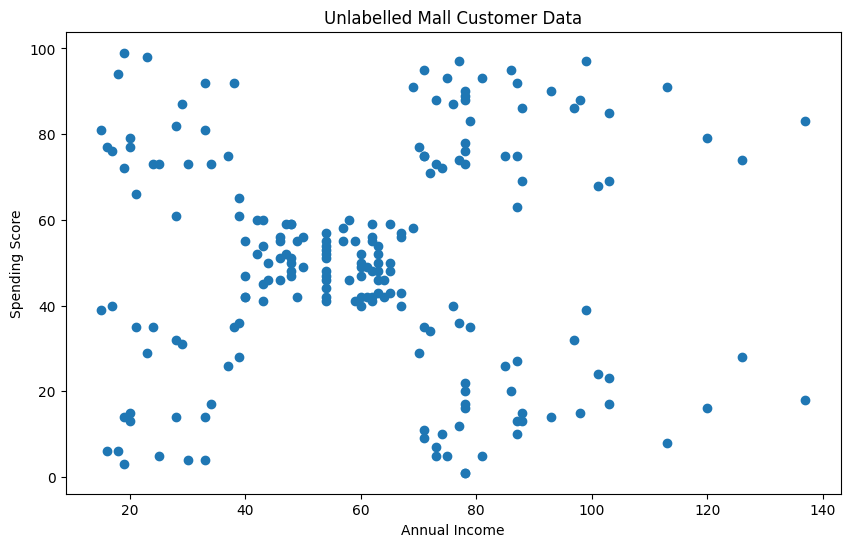

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Unlabelled Mall Customer Data')

In [5]:
#Annual Income and Spending Score
X = df.iloc[:, [3,4]].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

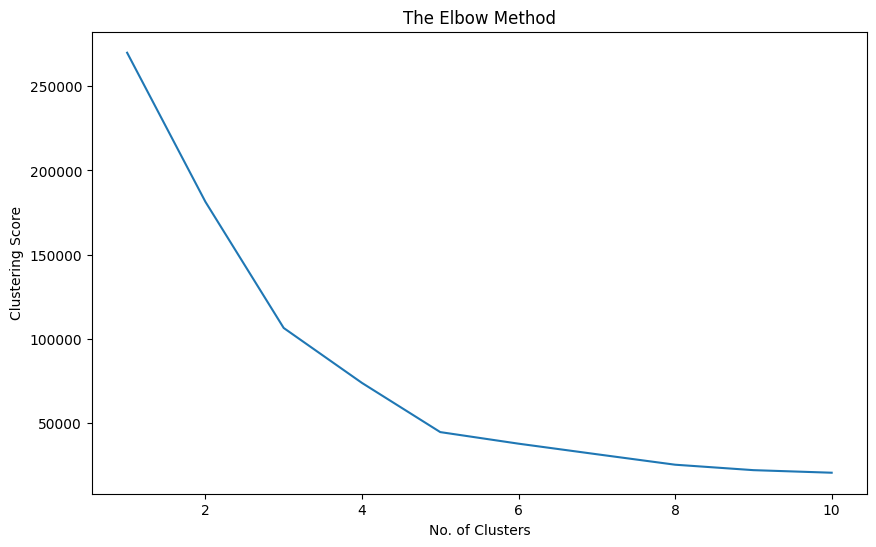

In [10]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
#plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('Broj klastera')
plt.ylabel('Clustering Score')
plt.show()

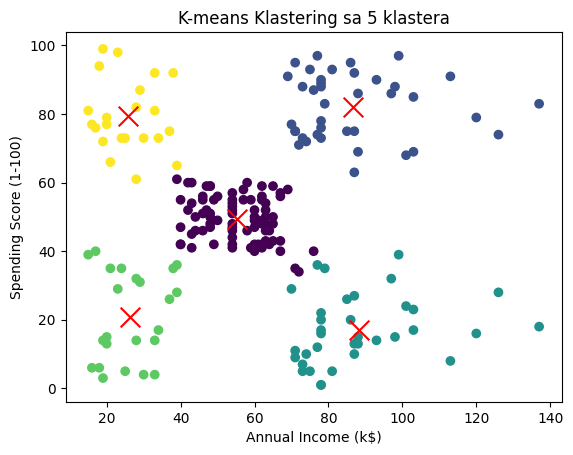

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Pretpostavimo da koristimo kolone 'Annual Income (k$)' i 'Spending Score (1-100)' za klasteriranje
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Kreiranje i treniranje K-means modela sa 5 klastera
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

# Dodela klastera
labels = kmeans.labels_

# Vizualizacija rezultata
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x')
plt.title('K-means Klastering sa 5 klastera')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()



In [8]:
from sklearn.metrics import silhouette_score

In [9]:
# Izračunavanje metrika za evaluaciju
silhouette_avg = silhouette_score(X, labels)

# Ispisivanje metrika
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.553931997444648


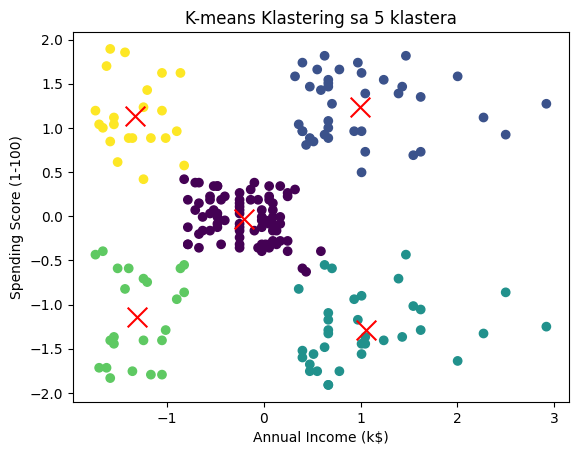

Silhouette Score: 0.5546571631111091


In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Učitavanje podataka
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

# Pretpostavimo da koristimo kolone 'Annual Income (k$)' i 'Spending Score (1-100)' za klasteriranje
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Imputacija nedostajućih vrijednosti
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardizacija podataka
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# K-means klastering sa 5 klastera
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_scaled)

# Dodjela klastera
labels = kmeans.labels_

# Vizualizacija rezultata
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x')
plt.title('K-means Klastering sa 5 klastera')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Evaluacija modela
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {silhouette_avg}')
